#### Import the required modules and set the seed to repeat the analysis

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.6'

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

#### cifar_10 dataset consists of 60000 images of 32x32 pixels on 3 channels

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Visualize some samples in the training datasets

def sample(X_train, y_train, classes, samples_per_class=6):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)    # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):         # plot the image one by one
            plt_idx = i * num_classes + y + 1  # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

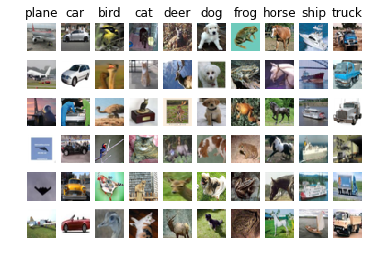

In [6]:
sample(X_train, y_train, classes)

#### Normalize the data and convert the labels to categories

In [7]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert the labels to categories
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
train_x = np.reshape(X_train, (X_train.shape[0], -1))
test_x = np.reshape(X_test, (X_test.shape[0], -1))

In [10]:
train_x.shape

(50000, 3072)

In [11]:
test_x.shape

(10000, 3072)

In [12]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [13]:
y_train.shape

(50000,)

In [14]:
y_test.shape

(10000,)

In [16]:
# Implementation of the Gradient Bossting Model
from sklearn import tree
from sklearn import metrics

clf = GradientBoostingClassifier()
gb = clf.fit(train_x, y_train)
print("Classification is Done.")

Classification is Done.


In [17]:
%%time
output_Predicted_gb = gb.predict(train_x);
accuracy_train_gb = metrics.accuracy_score(output_Predicted_gb, y_train)
print("Accuracy on the train dataset:")
print(accuracy_train_gb* 100)

output_predicted_validation_gb = clf.predict(test_x)
accuracy_test_gb = metrics.accuracy_score(output_predicted_validation_gb, y_test)
print("Accuracy on the test dataset is:")
print(accuracy_test_gb * 100)

Accuracy on the train dataset:
57.75
Accuracy on the test dataset is:
47.81
Wall time: 4.53 s


In [18]:
y_pred = y_test
pred_gb = output_predicted_validation_gb

In [19]:
from sklearn.metrics import confusion_matrix

conf_mx_gb = confusion_matrix(y_pred, pred_gb)
conf_mx_gb

array([[544,  31,  68,  17,  37,  18,  25,  40, 174,  46],
       [ 44, 555,  23,  37,  24,  33,  32,  34,  46, 172],
       [ 80,  28, 345,  71, 154,  65, 125,  76,  39,  17],
       [ 49,  30,  97, 293,  68, 183, 155,  49,  29,  47],
       [ 50,  11, 148,  38, 406,  49, 167,  92,  26,  13],
       [ 31,  20, 101, 165,  69, 406,  84,  69,  31,  24],
       [  8,  32,  86,  61, 117,  37, 593,  26,  10,  30],
       [ 51,  16,  46,  69, 108,  96,  50, 475,  18,  71],
       [114,  69,  14,  28,  20,  28,  20,  23, 614,  70],
       [ 55, 153,  15,  38,  14,  29,  27,  47,  72, 550]])

<IPython.core.display.Javascript object>


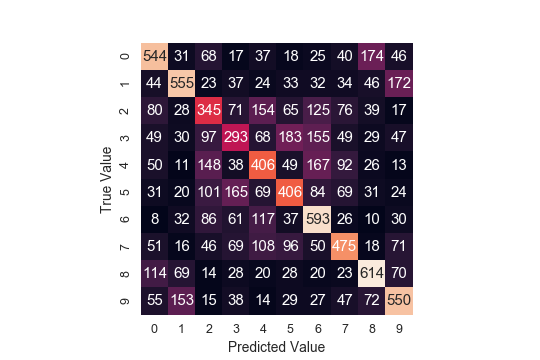

In [21]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(conf_mx_gb, square=True, annot=True, fmt = 'd', cbar= False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()